In [946]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [947]:
# loading our dataset

df = pd.read_csv('/home/addam/Downloads/core/hypothesis/autolib_daily_events_postal_code.csv')

In [948]:
# dataset description
v_names = pd.read_excel('/home/addam/Downloads/core/hypothesis/columns_explanation.xlsx')

In [949]:
# checking information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [950]:
# data cleaning
# dealing with missing values
# count the number of non - missing values 

df.count()

Postal code               16085
date                      16085
n_daily_data_points       16085
dayOfWeek                 16085
day_type                  16085
BlueCars_taken_sum        16085
BlueCars_returned_sum     16085
Utilib_taken_sum          16085
Utilib_returned_sum       16085
Utilib_14_taken_sum       16085
Utilib_14_returned_sum    16085
Slots_freed_sum           16085
Slots_taken_sum           16085
dtype: int64

In [951]:
# count number of missing values in our dataframe

np.count_nonzero(df.isnull())

0

In [952]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [953]:
# previewing df

df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [954]:
# bottom of dataset

df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [955]:
# variable name definitions
v_names

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [956]:
# checking for duplicates

df.duplicated().count()


16085

In [957]:
# dropping duplicates if any

df.drop_duplicates()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [958]:
# resetting index
df.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001.0,1/1/2018,1440.0,0.0,weekday,110,103.0,3.0,2.0,10.0,9.0,22.0,20.0
1,75002.0,1/2/2018,1438.0,1.0,weekend,98,94.0,1.0,1.0,8.0,8.0,23.0,22.0
2,75003.0,1/3/2018,1439.0,2.0,NaN,138,139.0,0.0,0.0,2.0,2.0,27.0,27.0
3,75004.0,1/4/2018,1320.0,3.0,NaN,104,104.0,2.0,3.0,9.0,6.0,25.0,21.0
4,75005.0,1/5/2018,1437.0,4.0,NaN,114,117.0,6.0,6.0,6.0,10.0,18.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,NaN,NaN,NaN,NaN,NaN,111,114.0,NaN,NaN,NaN,NaN,NaN,NaN
928,NaN,NaN,NaN,NaN,NaN,77,82.0,NaN,NaN,NaN,NaN,NaN,NaN
929,NaN,NaN,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
930,NaN,NaN,NaN,NaN,NaN,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [959]:
import numpy as np
# Then count those missing values in our dataframe
#
np.count_nonzero(df.isnull())

0

In [960]:
df.shape

(16085, 13)

In [961]:
df = df.dropna()
df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [962]:
# confirming there are only non-misssing values

df.count()

Postal code               16085
date                      16085
n_daily_data_points       16085
dayOfWeek                 16085
day_type                  16085
BlueCars_taken_sum        16085
BlueCars_returned_sum     16085
Utilib_taken_sum          16085
Utilib_returned_sum       16085
Utilib_14_taken_sum       16085
Utilib_14_returned_sum    16085
Slots_freed_sum           16085
Slots_taken_sum           16085
dtype: int64

In [963]:
# checking for whitespaces and filling them

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

/tmp/ipykernel_7322/169085883.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [964]:
# data analysis
# number of postal codes
df.postal_code.value_counts()


75001    156
92700    156
93350    156
93310    156
93260    156
        ... 
93440    151
93370    149
92340    147
93200    126
93390     84
Name: postal_code, Length: 104, dtype: int64

In [965]:
# row where city is paris

'''df_paris = df[df['city'].map(lambda city: 'Paris' in city)]
df_paris'''


"df_paris = df[df['city'].map(lambda city: 'Paris' in city)]\ndf_paris"

In [966]:
# row where subscription_status is operational in paris and kind is parking

#df_paris[(df_paris['subscription_status']=='operational') & (df_paris['kind']=='PARKING')]

In [967]:
# make period my index

'''df = df.set_index(['period'])
df'''

"df = df.set_index(['period'])\ndf"

In [968]:
# checking rows in most popular period in paris

#df.loc['2018-04-06 05:52:00']

## outliers

In [969]:
# detecting outliers using z score for postal code

outliers=[]

def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

detect_outlier(df['postal_code'])

[]

## exploratory analysis: univariate

In [970]:
# Ploting the univariate summaries and recording our observations
# frequency table
frequency_df = pd.DataFrame(df, columns=['postal_code', 'date'])
frequency_df.date.value_counts()

5/20/2018    104
5/5/2018     104
5/27/2018    104
5/26/2018    104
5/25/2018    104
            ... 
4/5/2018     102
3/29/2018    102
3/14/2018    101
2/24/2018     98
6/19/2018     94
Name: date, Length: 156, dtype: int64

In [971]:
# general summaries
df.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [972]:
# skewness

df.skew()

/tmp/ipykernel_7322/1027777572.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


postal_code              -1.168778
n_daily_data_points      -5.742776
dayofweek                 0.018824
bluecars_taken_sum        2.406355
bluecars_returned_sum     2.412085
utilib_taken_sum          2.556872
utilib_returned_sum       2.578665
utilib_14_taken_sum       2.510924
utilib_14_returned_sum    2.511488
slots_freed_sum           2.597406
slots_taken_sum           2.596904
dtype: float64

In [973]:
# kurtosis

df.kurt()

/tmp/ipykernel_7322/2445507526.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


postal_code               -0.542143
n_daily_data_points       36.594846
dayofweek                 -1.260994
bluecars_taken_sum         6.172692
bluecars_returned_sum      6.186288
utilib_taken_sum           7.702362
utilib_returned_sum        7.936357
utilib_14_taken_sum        7.186815
utilib_14_returned_sum     7.185463
slots_freed_sum            6.454514
slots_taken_sum            6.442553
dtype: float64

array([[<AxesSubplot:title={'center':'postal_code'}>,
        <AxesSubplot:title={'center':'n_daily_data_points'}>,
        <AxesSubplot:title={'center':'dayofweek'}>],
       [<AxesSubplot:title={'center':'bluecars_taken_sum'}>,
        <AxesSubplot:title={'center':'bluecars_returned_sum'}>,
        <AxesSubplot:title={'center':'utilib_taken_sum'}>],
       [<AxesSubplot:title={'center':'utilib_returned_sum'}>,
        <AxesSubplot:title={'center':'utilib_14_taken_sum'}>,
        <AxesSubplot:title={'center':'utilib_14_returned_sum'}>],
       [<AxesSubplot:title={'center':'slots_freed_sum'}>,
        <AxesSubplot:title={'center':'slots_taken_sum'}>, <AxesSubplot:>]],
      dtype=object)

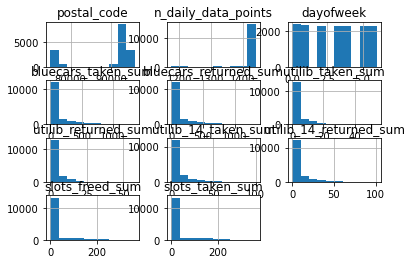

In [974]:
df.hist()

## bivariate 

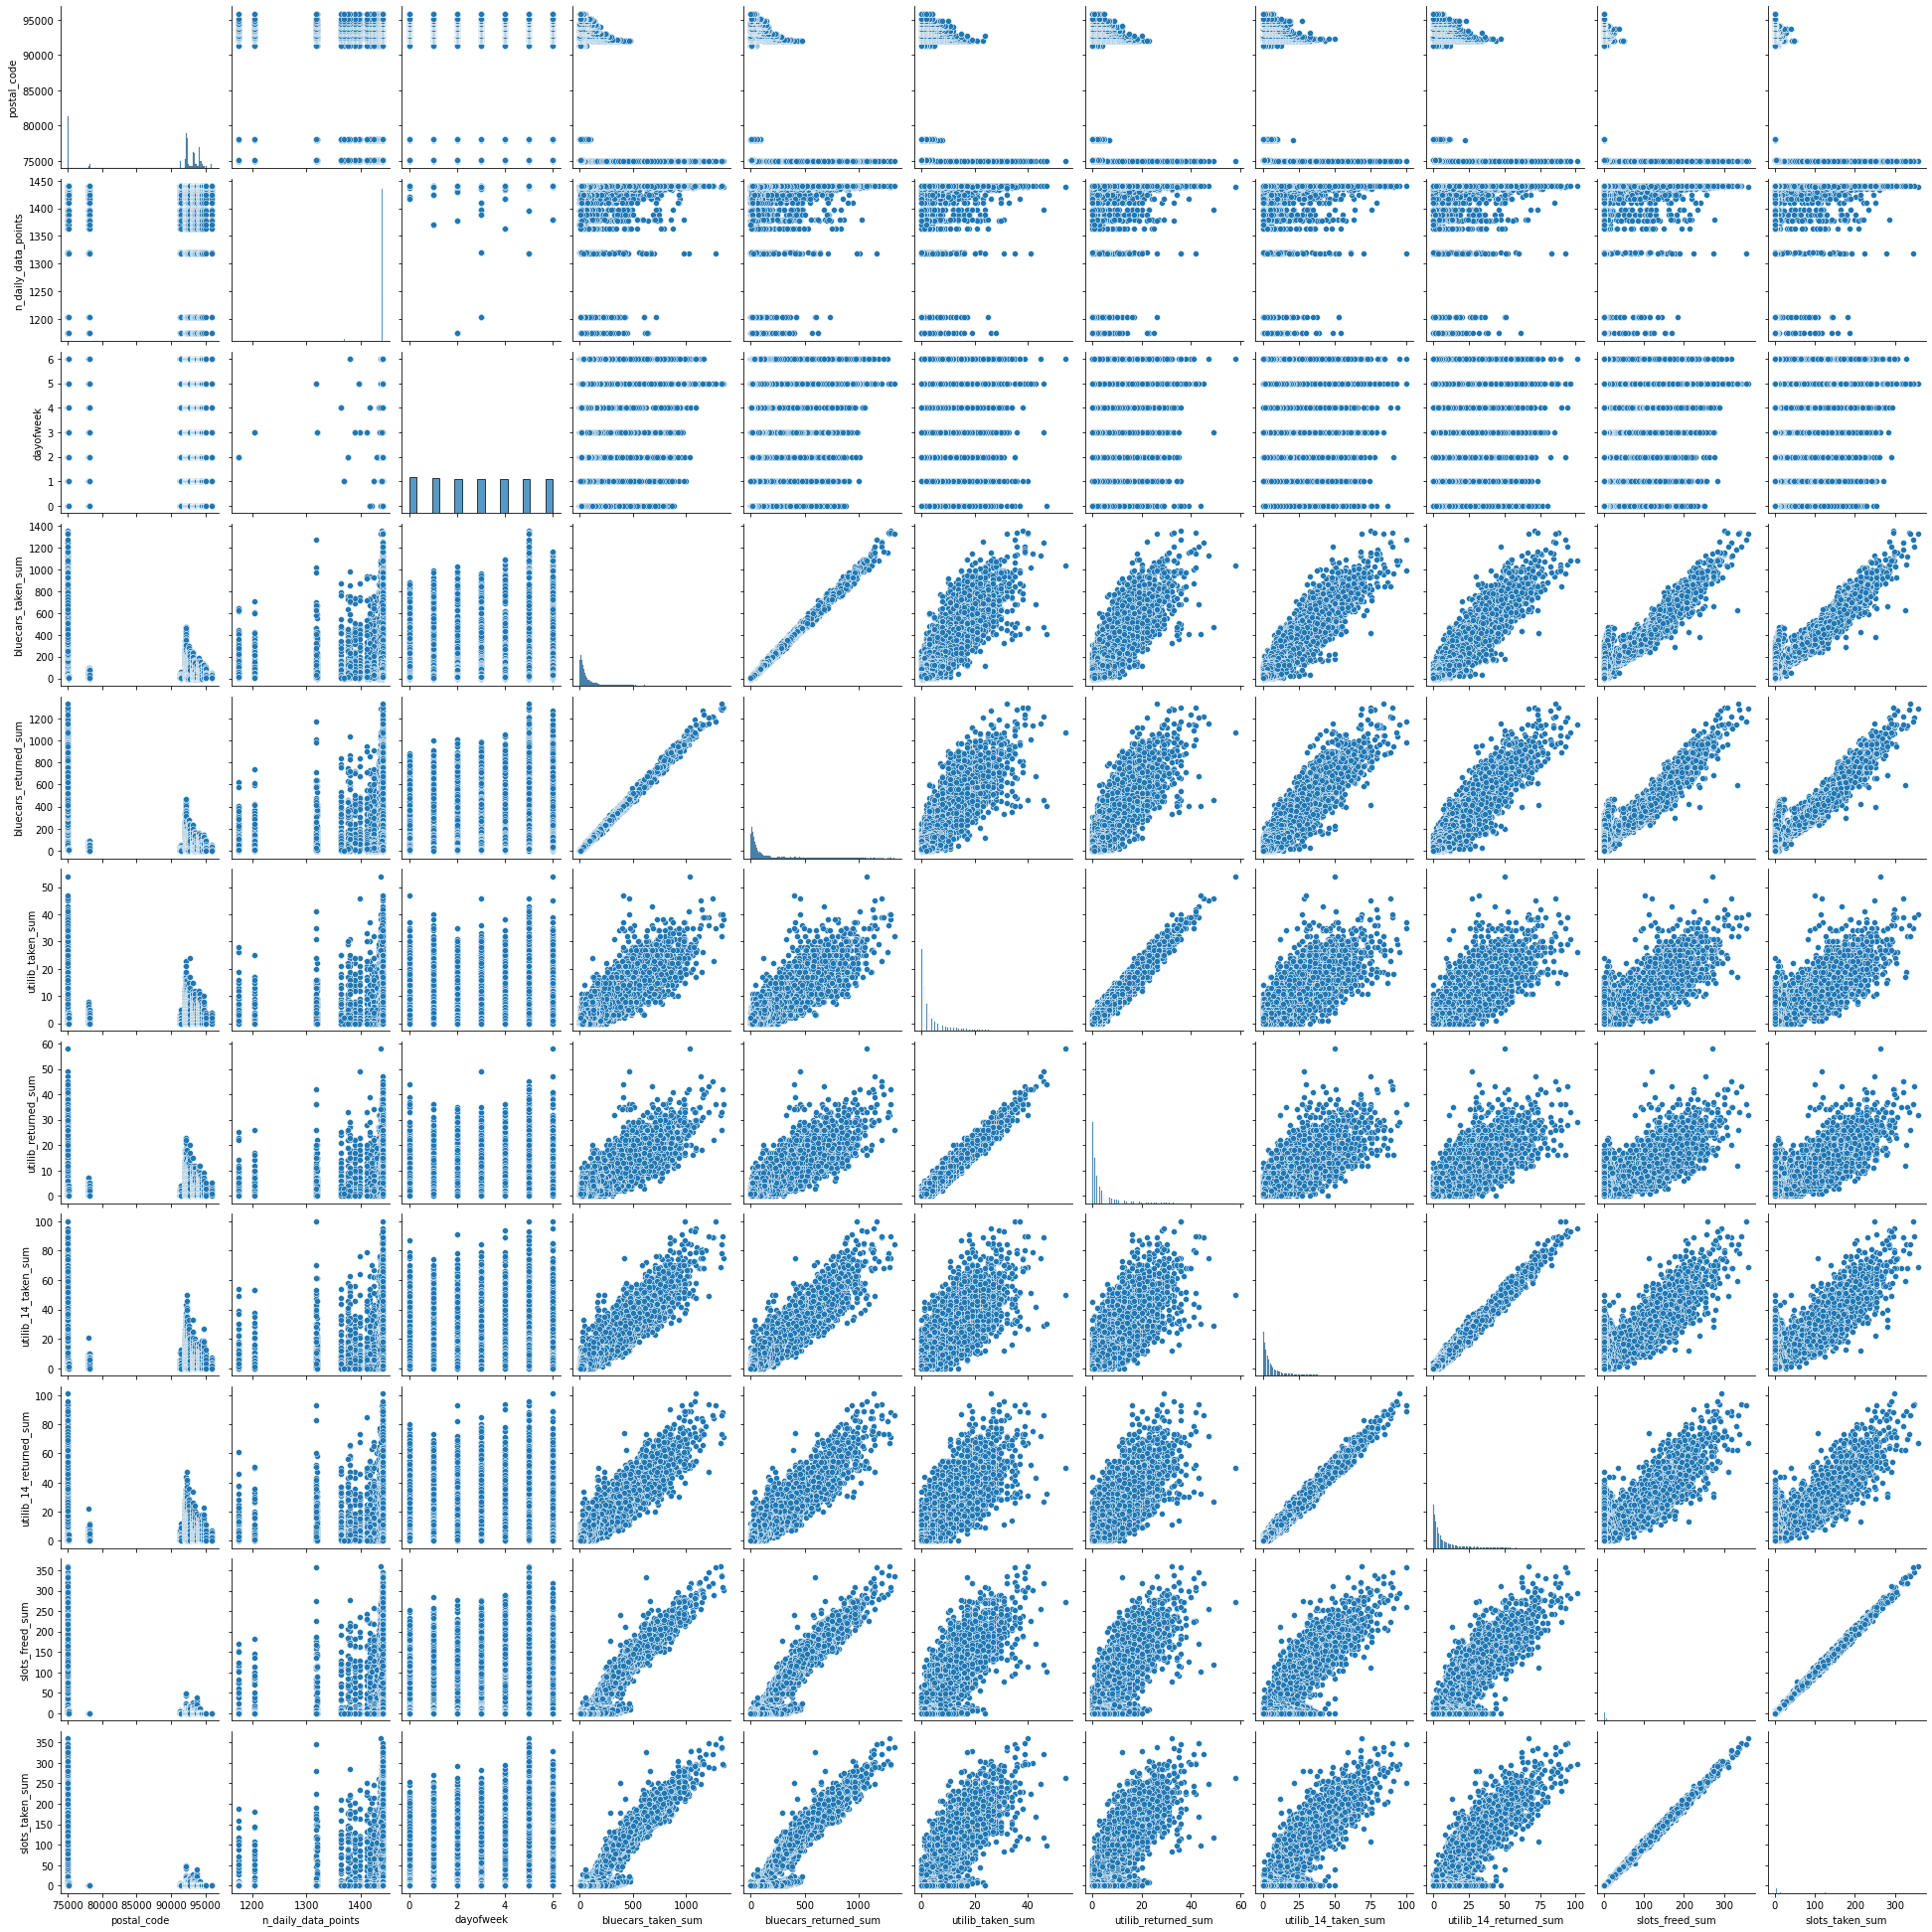

In [975]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df)
plt.show()

In [976]:
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

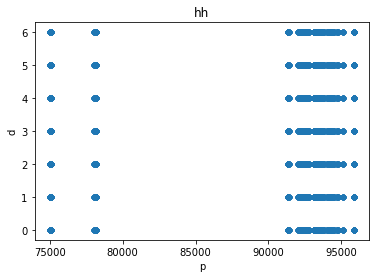

In [977]:
# Using Pandas: Plotting our scatterplot to compare the variables
df.plot(x = 'postal_code', y = 'dayofweek', kind='scatter')

# Giving our scatterplot a title
plt.title('hh')

# Labelling our x axis
plt.xlabel('p')

# Labelling our y axis
plt.ylabel('d')

# We then display our scatterplot as shown below
plt.show()

In [978]:
# general correlation
df.corr()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postal_code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayofweek,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
bluecars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
bluecars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


In [979]:
# correlation
# Calculating the pearson coefficient
pc = df["bluecars_taken_sum"].corr(df["bluecars_returned_sum"], method="pearson") 
print(pc)

# Checking whether you have to define the pearson
coeff = df["bluecars_taken_sum"].corr(df["bluecars_returned_sum"]) 
print(coeff)

0.9986597051672202
0.9986597051672202


## test for normality

In [980]:
# dropping columns
dff = df.drop(columns = ['date','day_type'], axis=1)
dff

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1440,0,110,103,3,2,10,9,22,20
1,75001,1438,1,98,94,1,1,8,8,23,22
2,75001,1439,2,138,139,0,0,2,2,27,27
3,75001,1320,3,104,104,2,2,9,8,25,21
4,75001,1440,4,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,1440,4,15,10,0,0,2,3,0,0
16081,95880,1440,5,19,19,0,0,2,1,0,0
16082,95880,1440,6,33,35,1,1,0,0,0,0
16083,95880,1440,0,11,14,3,5,2,2,0,0


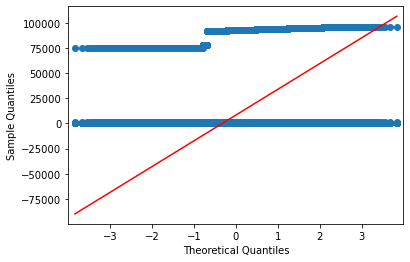

In [981]:
# q-q plot
from statsmodels.graphics.gofplots import qqplot
from numpy.random import seed

# seed the random number generator
seed(1)

# q-q plot
qqplot(dff, line='s')
plt.show()

From the q-q plot above the data seems to be following a normal distribution. The data is discrete not continuous.

## multivariate

In [982]:
df

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [983]:
# dropping date column
df1 = df.drop('date', axis = 1)

In [984]:
# preprocessing
X = df1.drop('day_type', 1)
y = df1['day_type']

/tmp/ipykernel_7322/1446392213.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df1.drop('day_type', 1)


In [985]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [986]:
# Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [987]:
# applying pca

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [988]:
# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([7.20082546e-01, 9.13194268e-02, 9.06988505e-02, 4.54748586e-02,
       2.83890579e-02, 1.52655613e-02, 6.23204413e-03, 1.62299507e-03,
       7.30273275e-04, 1.44551275e-04, 3.98354243e-05])

In [989]:
# Using 1 Principal Component

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [990]:
# Training and Making Predictions
# using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set result
y_pred = classifier.predict(X_test)

In [991]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[2237   76]
 [ 847   57]]
Accuracy 0.7130867267640659


From the above experimentation we achieved optimal level of accuracy while significantly reducing the number of features in the dataset. We saw that accuracy achieved with only 1 principal component is equal to the accuracy achieved with will feature set i.e 71.31%

## sampling

In [992]:
df.count()

postal_code               16085
date                      16085
n_daily_data_points       16085
dayofweek                 16085
day_type                  16085
bluecars_taken_sum        16085
bluecars_returned_sum     16085
utilib_taken_sum          16085
utilib_returned_sum       16085
utilib_14_taken_sum       16085
utilib_14_returned_sum    16085
slots_freed_sum           16085
slots_taken_sum           16085
dtype: int64

In [993]:
df['day_type'].value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

In [994]:
# testing ratio
# Non stratified sample
non_strat_output = df.sample(frac=0.1) 

# check the proportion of the non_stratified sample
print(non_strat_output['day_type'].value_counts())

weekday    1148
weekend     460
Name: day_type, dtype: int64


In [995]:
# create a random sample

# Stratified sample
strat_output = df.groupby('day_type', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(strat_output['day_type'].value_counts())

# Check the stratified output
#print(strat_output)

weekday    1154
weekend     454
Name: day_type, dtype: int64


In [996]:
strat_output1 = strat_output.drop(columns = ['date','day_type'],axis=1)
strat_output1

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
9460,92500,1440,1,135,123,1,0,11,12,0,0
15999,95880,1440,3,13,14,0,1,1,0,0,0
6786,92250,1439,0,45,48,3,6,3,2,3,3
3009,75020,1437,3,437,427,13,14,40,36,113,110
5464,92160,1438,0,23,24,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8495,92370,1440,5,30,32,1,2,1,1,0,0
14960,94410,1439,6,34,30,1,0,1,1,0,0
9383,92500,1440,5,181,166,5,3,10,10,0,0
11058,93260,1440,6,56,59,2,2,5,5,15,16


In [997]:
strat_output1.count()

postal_code               1608
n_daily_data_points       1608
dayofweek                 1608
bluecars_taken_sum        1608
bluecars_returned_sum     1608
utilib_taken_sum          1608
utilib_returned_sum       1608
utilib_14_taken_sum       1608
utilib_14_returned_sum    1608
slots_freed_sum           1608
slots_taken_sum           1608
dtype: int64

In [998]:
strat_output1.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000
mean,89134.929104,1432.229478,2.991915,120.144900,120.305970,3.522388,3.527985,8.208955,8.168532,21.090174,21.117537
std,7444.492530,31.531795,1.990784,177.132977,177.542954,5.571686,5.624572,12.336946,12.203658,50.146679,50.255147
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91400.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92350.000000,1440.000000,3.000000,46.000000,45.500000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,125.250000,126.000000,4.000000,4.000000,10.000000,9.000000,5.000000,4.000000
max,95880.000000,1440.000000,6.000000,1144.000000,1117.000000,37.000000,38.000000,94.000000,94.000000,288.000000,286.000000


In [999]:
df.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


## implement solution

## hypothesi testing 1

### Step 1: null hypothesis: sample mean is equal to original

### Step 2: Alternative Hypothesis: sample mean is not equal to original

### Step 3: Significance Level: 0.05

### Step 4: Test Statistic and Corresponding P-Value

In [1000]:
# assumption using p value and z score
# sample mean is equal to original
zscore =(strat_output1.mean() - df.mean() ) / df.std()
zscore

/tmp/ipykernel_7322/1018947586.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  zscore =(strat_output1.mean() - df.mean() ) / df.std()


postal_code               0.044935
n_daily_data_points       0.027064
dayofweek                 0.011112
bluecars_taken_sum       -0.031182
bluecars_returned_sum    -0.030225
utilib_taken_sum         -0.030249
utilib_returned_sum      -0.029378
utilib_14_taken_sum      -0.030427
utilib_14_returned_sum   -0.033465
slots_freed_sum          -0.029525
slots_taken_sum          -0.028991
dtype: float64

In [1001]:
from scipy.stats import norm
#import statistics
prob = norm.cdf(zscore)
prob

array([0.51792054, 0.51079575, 0.50443282, 0.48756203, 0.48794389,
       0.48793406, 0.48828174, 0.48786308, 0.48665193, 0.48822288,
       0.48843604])

### Step 5: Drawing a Conclusion

All the p values are greater than 2.5% hence the null hypothesis is accepted. This is on a confidence level of 95%.

## Hypothesis testing 2

### null: Mean for Blue cars taken is more than mean for blue cars returned in on a weekday

### alternate: Mean for Blue cars taken is less than cars returned on a weekday

### Significance Level: 0.05

### Test Statistic and Corresponding P-Value

In [1002]:
# Using t statistic
import researchpy as rp
import scipy.stats as stats

summary, results = rp.ttest(group1= strat_output['bluecars_taken_sum'][strat_output['day_type'] == 'weekday'], group1_name= "Blue cars taken",
                            group2= strat_output['bluecars_returned_sum'][strat_output['day_type'] == 'weekday'], group2_name= "Blue cars returned")
print(summary)
print(results)

             Variable       N        Mean          SD        SE   95% Conf.  \
0     Blue cars taken  1154.0  116.040728  169.272365  4.982911  106.264138   
1  Blue cars returned  1154.0  115.679376  167.939540  4.943677  105.979766   
2            combined  2308.0  115.860052  168.570820  3.508848  108.979227   

     Interval  
0  125.817317  
1  125.378986  
2  122.740877  
                                  Independent t-test    results
0  Difference (Blue cars taken - Blue cars return...     0.3614
1                              Degrees of freedom =   2306.0000
2                                               t =      0.0515
3                           Two side test p value =      0.9589
4                          Difference < 0 p value =      0.5205
5                          Difference > 0 p value =      0.4795
6                                       Cohen's d =      0.0021
7                                       Hedge's g =      0.0021
8                                   Glass's

### conclusion

The mean for the Blue cars taken(116.04) was statistically significantly higher than the mean for Blue cars returned(115.68) on the postal code 75015.  t(2306)= 0.0515, p= 0.9589. The p value being greater than 2.5%, the null hypothesis stands.

## hypothesis 3

### null: Mean for Blue cars taken is less than cars returned on a weekend

### alternative: Mean for Blue cars taken is more than cars returned on a weekend

### Significance Level: 0.05

### Test Statistic and Corresponding P-Value

In [1003]:
# Using t statistic
import researchpy as rp
import scipy.stats as stats

summary, results = rp.ttest(group1= strat_output['bluecars_taken_sum'][strat_output['day_type'] == 'weekend'], group1_name= "Blue cars taken",
                            group2= strat_output['bluecars_returned_sum'][strat_output['day_type'] == 'weekend'], group2_name= "Blue cars returned")
print(summary)
print(results)

             Variable      N        Mean          SD        SE   95% Conf.  \
0     Blue cars taken  454.0  130.577093  195.509573  9.175719  112.544836   
1  Blue cars returned  454.0  132.066079  199.606169  9.367982  113.655985   
2            combined  908.0  131.321586  197.460951  6.552972  118.460835   

     Interval  
0  148.609349  
1  150.476173  
2  144.182337  
                                  Independent t-test   results
0  Difference (Blue cars taken - Blue cars return...   -1.4890
1                              Degrees of freedom =   906.0000
2                                               t =    -0.1135
3                           Two side test p value =     0.9096
4                          Difference < 0 p value =     0.4548
5                          Difference > 0 p value =     0.5452
6                                       Cohen's d =    -0.0075
7                                       Hedge's g =    -0.0075
8                                   Glass's delta =    -

### conclusion

The mean for the Blue cars taken(130.58) was statistically significantly lower than the mean for Blue cars returned(132.07) on a weekend.  t(906)= -0.1135, p= 0.9096. The p value being greater than 2.5%, the null hypothesis stands.

## hypothesis 4

### null: The number of Blue cars taken is less than the number of utilib resource taken on a weekday

### alternative: The number of Blue cars taken is more than the number of utilib resource taken on a weekday

### Significance Level: 0.05

### Test Statistic and Corresponding P-Value

In [1004]:
# Using t statistic
import researchpy as rp
import scipy.stats as stats

summary, results = rp.ttest(group1= strat_output['bluecars_taken_sum'][strat_output['day_type'] == 'weekday'], group1_name= "Blue cars taken",
                            group2= strat_output['utilib_taken_sum'][strat_output['day_type'] == 'weekday'], group2_name= "utilib_taken")
print(summary)
print(results)

          Variable       N        Mean          SD        SE   95% Conf.  \
0  Blue cars taken  1154.0  116.040728  169.272365  4.982911  106.264138   
1     utilib_taken  1154.0    3.388215    5.352945  0.157576    3.079047   
2         combined  2308.0   59.714471  132.320444  2.754286   54.313336   

     Interval  
0  125.817317  
1    3.697383  
2   65.115607  
                               Independent t-test    results
0  Difference (Blue cars taken - utilib_taken) =    112.6525
1                           Degrees of freedom =   2306.0000
2                                            t =     22.5965
3                        Two side test p value =      0.0000
4                       Difference < 0 p value =      1.0000
5                       Difference > 0 p value =      0.0000
6                                    Cohen's d =      0.9407
7                                    Hedge's g =      0.9404
8                                Glass's delta =      0.6655
9                    

The mean for the Blue cars taken(116.04) was statistically significantly higher than the mean for utilib resource taken(3.388215) on a weekday.  t(2306)= 22.5965, p= 0.0000. The p value being lesser than 2.5%, the null hypothesis will be rejected and the alternative hypothesis considered.

## hypothesis 5

### null: The mean for utilib resource is greater than the mean for utilib 14 resources on a weekday

### alternative: The mean for utilib resource is less than the mean for utilib 14 resources on a weekday

### Significance Level: 0.05

### Test Statistic and Corresponding P-Value

In [1005]:
strat_output.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [1006]:
# Using t statistic
import researchpy as rp
import scipy.stats as stats

summary, results = rp.ttest(group1= strat_output['utilib_taken_sum'][strat_output['day_type'] == 'weekday'], group1_name= "utilib_taken_sum",
                            group2= strat_output['utilib_14_taken_sum'][strat_output['day_type'] == 'weekday'], group2_name= "utilib_14_taken_sum")
print(summary)
print(results)

              Variable       N      Mean         SD        SE  95% Conf.  \
0     utilib_taken_sum  1154.0  3.388215   5.352945  0.157576   3.079047   
1  utilib_14_taken_sum  1154.0  8.008666  12.100974  0.356219   7.309755   
2             combined  2308.0  5.698440   9.635627  0.200568   5.305127   

   Interval  
0  3.697383  
1  8.707576  
2  6.091753  
                                  Independent t-test    results
0  Difference (utilib_taken_sum - utilib_14_taken...    -4.6205
1                              Degrees of freedom =   2306.0000
2                                               t =    -11.8620
3                           Two side test p value =      0.0000
4                          Difference < 0 p value =      0.0000
5                          Difference > 0 p value =      1.0000
6                                       Cohen's d =     -0.4938
7                                       Hedge's g =     -0.4937
8                                   Glass's delta =     -0.8632

## conclusion

The mean for the utilib taken(3.388215) was statistically significantly lower than the mean for utilib14 resource taken(8.008666) on a weekday.  t(2306)= -11.8620, p= 0.0000. The p value being lesser than 2.5%, the null hypothesis will be rejected and the alternative hypothesis considered.

## hypothesis 6

### null: The mean for utilib resource is greater than the mean for utilib 14 resources on a weekend

### alternative: The mean for utilib resource is less than the mean for utilib 14 resources on a weekend

### Significance Level: 0.05

### Test Statistic and Corresponding P-Value

In [1007]:
# Using t statistic
import researchpy as rp
import scipy.stats as stats

summary, results = rp.ttest(group1= strat_output['utilib_taken_sum'][strat_output['day_type'] == 'weekend'], group1_name= "utilib_taken_sum",
                            group2= strat_output['utilib_14_taken_sum'][strat_output['day_type'] == 'weekend'], group2_name= "utilib_14_taken_sum")
print(summary)
print(results)

              Variable      N      Mean         SD        SE  95% Conf.  \
0     utilib_taken_sum  454.0  3.863436   6.085399  0.285602   3.302167   
1  utilib_14_taken_sum  454.0  8.718062  12.917117  0.606230   7.526689   
2             combined  908.0  6.290749  10.379207  0.344446   5.614745   

   Interval  
0  4.424705  
1  9.909434  
2  6.966753  
                                  Independent t-test   results
0  Difference (utilib_taken_sum - utilib_14_taken...   -4.8546
1                              Degrees of freedom =   906.0000
2                                               t =    -7.2442
3                           Two side test p value =     0.0000
4                          Difference < 0 p value =     0.0000
5                          Difference > 0 p value =     1.0000
6                                       Cohen's d =    -0.4808
7                                       Hedge's g =    -0.4804
8                                   Glass's delta =    -0.7977
9            

## conclusion

Similar to weekdays, the mean for the utilib taken(3.863436) was statistically significantly lower than the mean for utilib14 resource taken(8.718062) on a weekday.  t(2306)= -7.2442, p= 0.0000. The p value being lesser than 2.5%, the null hypothesis will be rejected and the alternative hypothesis considered.

## hypothesis 7

### null: The mean for the number of slots taken is greater than the mean for the number of slots freed.

### alternative: The mean for the number of slots taken is less than the mean for the number of slots freed.

### Significance Level: 0.05

### Test Statistic and Corresponding P-Value

In [1008]:
strat_output.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [1009]:
# Using t statistic
import researchpy as rp
import scipy.stats as stats

summary, results = rp.ttest(group1= strat_output['slots_taken_sum'][strat_output['day_type'] == 'weekday'], group1_name= "slots taken",
                            group2= strat_output['slots_freed_sum'][strat_output['day_type'] == 'weekday'], group2_name= "slots freed")
print(summary)
print(results)

      Variable       N       Mean         SD        SE  95% Conf.   Interval
0  slots taken  1154.0  20.740901  48.398010  1.424704  17.945599  23.536204
1  slots freed  1154.0  20.759099  48.422388  1.425421  17.962388  23.555809
2     combined  2308.0  20.750000  48.399708  1.007453  18.774392  22.725608
                          Independent t-test    results
0  Difference (slots taken - slots freed) =     -0.0182
1                      Degrees of freedom =   2306.0000
2                                       t =     -0.0090
3                   Two side test p value =      0.9928
4                  Difference < 0 p value =      0.4964
5                  Difference > 0 p value =      0.5036
6                               Cohen's d =     -0.0004
7                               Hedge's g =     -0.0004
8                           Glass's delta =     -0.0004
9                             Pearson's r =      0.0002


## conclusion

Similar to weekdays, the mean for the slots taken(20.740901) was statistically lower but close to the mean for slots freed(20.759099) on a weekday.  t(2306)= -0.0090, p= 0.9928. The p value being greater than 2.5%, the null hypothesis will be considered over the alternative hypothesis despite the means been closer to one another.

In [1010]:
strat_output.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')